# Grabbing Flux information
We can use pyNuHepMC to see if the input file comes with flux information. The interface is currently quite clunky, it will be improved in future revisions.

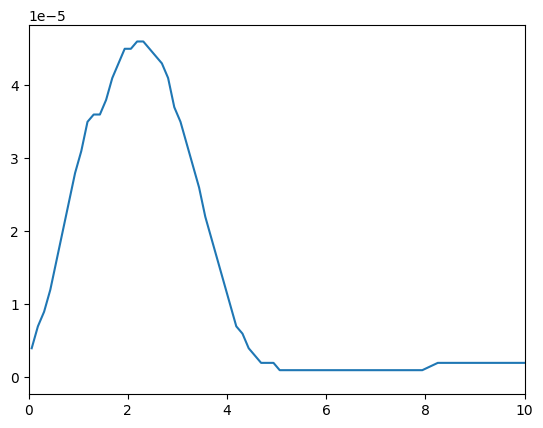

In [1]:
import pyNuHepMC as nhm
import pyNUISANCE as pn
import numpy as np
import matplotlib.pyplot as plt

evs = pn.EventSource("neut_DUNE_numu_BS1pi_LFG_1.21.pb.gz")
if not evs:
    print("Error: failed to open input file")

gri = evs.first()[0].run_info()
numu_flux_dist = nhm.ReaderUtils.GC7.read_energy_distribution(gri,14)
bin_edges = numu_flux_dist.bin_edges

ToGeV = 1E-3 if numu_flux_dist.is_in_MeV()  else 1.0
plt.xlim([0,10])
plt.plot(numu_flux_dist.get_bin_centers() * ToGeV,numu_flux_dist.get_content_count())
plt.show()